In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skm
import sklearn.ensemble as sk
import pylab as pl
import numpy as np
from sklearn.cross_validation import train_test_split

In [39]:
%matplotlib inline

####Import data

In [2]:
column_names = ['xval', 'yval', 'zval', 'activity']
part1 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/1.csv', header=None, names=column_names)
part2 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/2.csv', header=None, names=column_names)
part3 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/3.csv', header=None, names=column_names)
part4 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/4.csv', header=None, names=column_names)
part5 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/5.csv', header=None, names=column_names)
part6 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/6.csv', header=None, names=column_names)
part7 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/7.csv', header=None, names=column_names)
part8 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/8.csv', header=None, names=column_names)
part9 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/9.csv', header=None, names=column_names)
part10 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/10.csv', header=None, names=column_names)
part11 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/11.csv', header=None, names=column_names)
part12 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/12.csv', header=None, names=column_names)
part13 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/13.csv', header=None, names=column_names)
part14 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/14.csv', header=None, names=column_names)
part15 = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Projects/Accelerometer/15.csv', header=None, names=column_names)

####Add Features

In [3]:
def addrows(df):
    #Difference in values from one row to the next
    df["xdiff"] = df["xval"].diff(-1)
    df["ydiff"] = df["yval"].diff(-1)
    df["zdiff"] = df["zval"].diff(-1)
    df["xdiff_abs"] = abs(df["xdiff"])
    df["ydiff_abs"] = abs(df["ydiff"])
    df["zdiff_abs"] = abs(df["zdiff"])
    
    #Average Resultant Acceleration: sqrt(x^2 + y^2 + z^2)
    df["av_resultant_acc"] = np.sqrt((df['xval'])**2 + (df['yval'])**2 + (df['zval'])**2)
    
    #Find Average Values of each axis
    #X-axis
    df['x_avg'] = ""
    df['x_avg'][df['activity']==1] = np.mean(df['xval'][df['activity']==1])
    df['x_avg'][df['activity']==2] = np.mean(df['xval'][df['activity']==2])
    df['x_avg'][df['activity']==3] = np.mean(df['xval'][df['activity']==3])
    df['x_avg'][df['activity']==4] = np.mean(df['xval'][df['activity']==4])
    df['x_avg'][df['activity']==5] = np.mean(df['xval'][df['activity']==5])
    df['x_avg'][df['activity']==6] = np.mean(df['xval'][df['activity']==6])
    df['x_avg'][df['activity']==7] = np.mean(df['xval'][df['activity']==7])

    #y-axis
    df['y_avg'] = ""
    df['y_avg'][df['activity']==1] = np.mean(df['yval'][df['activity']==1])
    df['y_avg'][df['activity']==2] = np.mean(df['yval'][df['activity']==2])
    df['y_avg'][df['activity']==3] = np.mean(df['yval'][df['activity']==3])
    df['y_avg'][df['activity']==4] = np.mean(df['yval'][df['activity']==4])
    df['y_avg'][df['activity']==5] = np.mean(df['yval'][df['activity']==5])
    df['y_avg'][df['activity']==6] = np.mean(df['yval'][df['activity']==6])
    df['y_avg'][df['activity']==7] = np.mean(df['yval'][df['activity']==7])

    #z-axis
    df['z_avg'] = ""
    df['z_avg'][df['activity']==1] = np.mean(df['zval'][df['activity']==1])
    df['z_avg'][df['activity']==2] = np.mean(df['zval'][df['activity']==2])
    df['z_avg'][df['activity']==3] = np.mean(df['zval'][df['activity']==3])
    df['z_avg'][df['activity']==4] = np.mean(df['zval'][df['activity']==4])
    df['z_avg'][df['activity']==5] = np.mean(df['zval'][df['activity']==5])
    df['z_avg'][df['activity']==6] = np.mean(df['zval'][df['activity']==6])
    df['z_avg'][df['activity']==7] = np.mean(df['zval'][df['activity']==7])
    
    #Find Standard Deviation for each axis
    #x-axis
    df['x_std'] = ""
    df['x_std'][df['activity']==1] = np.std(df['xval'][df['activity']==1])
    df['x_std'][df['activity']==2] = np.std(df['xval'][df['activity']==2])
    df['x_std'][df['activity']==3] = np.std(df['xval'][df['activity']==3])
    df['x_std'][df['activity']==4] = np.std(df['xval'][df['activity']==4])
    df['x_std'][df['activity']==5] = np.std(df['xval'][df['activity']==5])
    df['x_std'][df['activity']==6] = np.std(df['xval'][df['activity']==6])
    df['x_std'][df['activity']==7] = np.std(df['xval'][df['activity']==7])

    #y-axis
    df['y_std'] = ""
    df['y_std'][df['activity']==1] = np.std(df['yval'][df['activity']==1])
    df['y_std'][df['activity']==2] = np.std(df['yval'][df['activity']==2])
    df['y_std'][df['activity']==3] = np.std(df['yval'][df['activity']==3])
    df['y_std'][df['activity']==4] = np.std(df['yval'][df['activity']==4])
    df['y_std'][df['activity']==5] = np.std(df['yval'][df['activity']==5])
    df['y_std'][df['activity']==6] = np.std(df['yval'][df['activity']==6])
    df['y_std'][df['activity']==7] = np.std(df['yval'][df['activity']==7])

    #z-axis
    df['z_std'] = ""
    df['z_std'][df['activity']==1] = np.std(df['zval'][df['activity']==1])
    df['z_std'][df['activity']==2] = np.std(df['zval'][df['activity']==2])
    df['z_std'][df['activity']==3] = np.std(df['zval'][df['activity']==3])
    df['z_std'][df['activity']==4] = np.std(df['zval'][df['activity']==4])
    df['z_std'][df['activity']==5] = np.std(df['zval'][df['activity']==5])
    df['z_std'][df['activity']==6] = np.std(df['zval'][df['activity']==6])
    df['z_std'][df['activity']==7] = np.std(df['zval'][df['activity']==7])
    
    #Calculate ratio of x axis to y axis, x axis to z axis, and y axis to z axis
    df['xvy'] = df['xdiff_abs']/df['ydiff_abs']
    df['xvz'] = df['xdiff_abs']/df['zdiff_abs']
    df['yvz'] = df['ydiff_abs']/df['zdiff_abs']
    
    #Calculate various angles
    df['angle_x-y'] = np.arcsin(df['ydiff']/(np.sqrt(df['xdiff']**2 + df['ydiff']**2)))
    df['angle_y-x'] = np.arcsin(df['xdiff']/(np.sqrt(df['xdiff']**2 + df['ydiff']**2)))
    df['angle_z-y'] = np.arcsin(df['ydiff']/(np.sqrt(df['zdiff']**2 + df['ydiff']**2)))
    df['angle_y-z'] = np.arcsin(df['zdiff']/(np.sqrt(df['zdiff']**2 + df['ydiff']**2)))
    df['angle_x-z'] = np.arcsin(df['zdiff']/(np.sqrt(df['xdiff']**2 + df['zdiff']**2)))
    df['angle_z-x'] = np.arcsin(df['xdiff']/(np.sqrt(df['xdiff']**2 + df['zdiff']**2)))
    
    return df
        

####Note: 
Combining all 15 sets of data is a bit too much for my computer to handle. I will just be combining three for now and proceeding accordingly. I will still write the code for combining and working with all 15 sets, but I will leave the extra code commented out.

In [4]:
addrows(part1)
# addrows(part2)
# addrows(part3)
# addrows(part4)
# addrows(part5)
addrows(part6)
# addrows(part7)
# addrows(part8)
# addrows(part9)
# addrows(part10)
addrows(part11)
# addrows(part12)
# addrows(part13)
# addrows(part14)
# addrows(part15)

/Users/molliepettit/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/molliepettit/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/molliepettit/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/molliepettit/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.p

,xval,yval,zval,activity,xdiff,ydiff,zdiff,xdiff_abs,ydiff_abs,zdiff_abs,...,z_std,xvy,xvz,yvz,angle_x-y,angle_y-x,angle_z-y,angle_y-z,angle_x-z,angle_z-x
0,1983,2438,1825,1,35,-4,28,35,4,28,...,40.83531,8.750000,1.250000,0.142857,-0.113792,1.457004,-0.141897,1.428899,0.674741,0.896055
1,1948,2442,1797,1,21,54,13,21,54,13,...,40.83531,0.388889,1.615385,4.153846,1.199905,0.370891,1.334551,0.236245,0.554307,1.016489
2,1927,2388,1784,1,-33,69,-47,33,69,47,...,40.83531,0.478261,0.702128,1.468085,1.124691,-0.446106,0.972827,-0.597969,-0.958644,-0.612152
3,1960,2319,1831,1,-7,45,-40,7,45,40,...,40.83531,0.155556,0.175000,1.125000,1.416478,-0.154319,0.844154,-0.726642,-1.397551,-0.173246
4,1967,2274,1871,1,-24,22,-11,24,22,11,...,40.83531,1.090909,2.181818,2.000000,0.741947,-0.828849,1.107149,-0.463648,-0.429762,-1.141034
5,1991,2252,1882,1,-19,-11,-11,19,11,11,...,40.83531,1.727273,1.727273,1.000000,-0.524796,-1.046001,-0.785398,-0.785398,-0.524796,-1.046001
6,2010,2263,1893,1,-27,-29,-26,27,29,26,...,40.83531,0.931034,1.038462,1.115385,-0.821097,-0.749699,-0.839890,-0.730907,-0.766532,-0.804264
7,2037,2292,1919,1,-4,-14,-6,4,14,6,...,40.83531,0.285714,0.666667,2.333333,-1.292497,-0.278300,-1.165905,-0.404892,-0.982794,-0.588003
8,2041,2306,1925,1,-2,8,12,2,8,12,...,40.83531,0.250000,0.166667,0.666667,1.325818,-0.244979,0.588003,0.982794,1.405648,-0.165149
9,2043,2298,1913,1,45,-38,29,45,38,29,...,40.83531,1.184211,1.551724,1.310345,-0.701260,0.869536,-0.918927,0.651869,0.572460,0.998337


In [6]:
list(part1.columns.values)

['xval',
 'yval',
 'zval',
 'activity',
 'xdiff',
 'ydiff',
 'zdiff',
 'xdiff_abs',
 'ydiff_abs',
 'zdiff_abs',
 'av_resultant_acc',
 'x_avg',
 'y_avg',
 'z_avg',
 'x_std',
 'y_std',
 'z_std',
 'xvy',
 'xvz',
 'yvz',
 'angle_x-y',
 'angle_y-x',
 'angle_z-y',
 'angle_y-z',
 'angle_x-z',
 'angle_z-x']

####Combine into one dataframe

In [5]:
frames = [part1, part6, part11]
# frames = [part1, part2, part3, part4, part5, part6, part7, part8, part9, part10, part11, part12, part13, part14, part15]

In [6]:
df = pd.concat(frames, ignore_index=True)

In [7]:
df

,xval,yval,zval,activity,xdiff,ydiff,zdiff,xdiff_abs,ydiff_abs,zdiff_abs,...,z_std,xvy,xvz,yvz,angle_x-y,angle_y-x,angle_z-y,angle_y-z,angle_x-z,angle_z-x
0,1502,2215,2153,1,-165,143,106,165,143,106,...,23.344,1.153846,1.556604,1.349057,0.714091,-0.856706,0.932913,0.637883,0.571031,-0.999765
1,1667,2072,2047,1,56,115,141,56,115,141,...,23.344,0.486957,0.397163,0.815603,1.117638,0.453158,0.684183,0.886614,1.192738,0.378058
2,1611,1957,1906,1,10,18,75,10,18,75,...,23.344,0.555556,0.133333,0.240000,1.063698,0.507099,0.235545,1.335251,1.438245,0.132552
3,1601,1939,1831,1,-42,-26,-48,42,26,48,...,23.344,1.615385,0.875000,0.541667,-0.554307,-1.016489,-0.496423,-1.074374,-0.851966,-0.718830
4,1643,1965,1879,1,39,6,-42,39,6,42,...,23.344,6.500000,0.928571,0.142857,0.152649,1.418147,0.141897,-1.428899,-0.822418,0.748378
5,1604,1959,1921,1,-36,130,-19,36,130,19,...,23.344,0.276923,1.894737,6.842105,1.300643,-0.270153,1.425670,-0.145126,-0.485622,-1.085174
6,1640,1829,1940,1,33,-81,30,33,81,30,...,23.344,0.407407,1.100000,2.700000,-1.183921,0.386876,-1.216091,0.354706,0.737815,0.832981
7,1607,1910,1910,1,61,-135,0,61,135,0,...,23.344,0.451852,inf,inf,-1.146403,0.424393,-1.570796,0.000000,0.000000,1.570796
8,1546,2045,1910,1,17,-4,-62,17,4,62,...,23.344,4.250000,0.274194,0.064516,-0.231091,1.339706,-0.064427,-1.506369,-1.303180,0.267616
9,1529,2049,1972,1,-108,71,27,108,71,27,...,23.344,1.521127,4.000000,2.629630,0.581565,-0.989231,1.207403,0.363393,0.244979,-1.325818


Changing inf and Nan values to a number so that the Random Forest Classifier will run

In [8]:
df = df.replace([np.inf, -np.inf], 999)
df = df.replace(np.nan, 999)

####Split the data into training and test sets

In [9]:
X = df[['xval', 'yval', 'zval', 'xdiff', 'ydiff', 'zdiff', 'av_resultant_acc', 'xvy', 'xvz', 'yvz','angle_x-y', 'angle_z-y', 'angle_x-z']]
y = df['activity']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.40)

##Random Forest

####Fit a random forest classifier with 500 estimators to your training set

In [10]:
rfc = sk.RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs = 5 )
model = rfc.fit(X_train, y_train)

In [11]:
rfc.oob_score_

0.81963622395397018

####Rank Features by Importance Scores

In [18]:
fi = enumerate(rfc.feature_importances_)
cols = df.columns
[(value,cols[i]) for (i,value) in fi if value > 0.0]

[(0.21189435270392148, 'xval'),
 (0.17064338813268035, 'yval'),
 (0.13544833305152443, 'zval'),
 (0.053319588395872738, 'activity'),
 (0.067397890887297918, 'xdiff'),
 (0.051761674255443313, 'ydiff'),
 (0.15342984355388359, 'zdiff'),
 (0.025484912628118486, 'xdiff_abs'),
 (0.024375479945145939, 'ydiff_abs'),
 (0.025235230487045589, 'zdiff_abs'),
 (0.026730519167565893, 'av_resultant_acc'),
 (0.026647279030112055, 'x_avg'),
 (0.02763150776138848, 'y_avg')]

Find only the top features:

In [ ]:
fi = enumerate(rfc.feature_importances_)
cols = df.columns
[(value,cols[i]) for (i,value) in fi if value > 0.05]

Rerun model with only top features

In [19]:
X = df[['xval', 'yval', 'zval', 'xdiff', 'ydiff', 'zdiff']]
y = df['activity']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.40)

In [20]:
rfc = sk.RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs = 5 )
model = rfc.fit(X_train, y_train)

###Computer Measures of Prediction Goodness

In [21]:
rfc.oob_score_

0.82059245395589087

In [34]:
test_pred = rfc.predict(X_test)

In [35]:
print("Accuracy = %f" %(skm.accuracy_score(y_test, test_pred)))

Accuracy = 0.820524


In [36]:
print("Precision = %f" %(skm.precision_score(y_test, test_pred)))

/Users/molliepettit/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/molliepettit/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision = 0.806796


In [37]:
print("Recall = %f" %(skm.recall_score(y_test, test_pred)))

Recall = 0.820524


/Users/molliepettit/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:1172: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [38]:
print("F1 score = %f" %(skm.f1_score(y_test, test_pred)))

F1 score = 0.803181


/Users/molliepettit/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/molliepettit/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


####Confusion Matrix

In [40]:
test_cm = skm.confusion_matrix(y_test, test_pred)

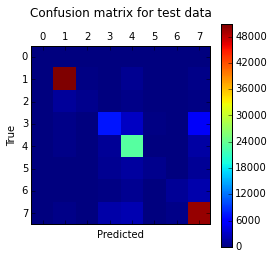

In [42]:
pl.matshow(test_cm)
pl.title('Confusion matrix for test data\n'
         + '                               ')
pl.xlabel('Predicted')
pl.ylabel('True')
pl.colorbar()
pl.show()

####ROC Curve

In [52]:
fpr, tpr, thresholds = skm.roc_curve(y_test, test_pred, pos_label=6)

In [53]:
skm.auc(fpr, tpr)

0.67840519630103824

In [54]:
fpr

array([ 0.        ,  0.37079324,  0.37554159,  0.38297269,  0.5826553 ,
        0.65538566,  0.66129276,  1.        ])

In [55]:
tpr

array([ 0.        ,  0.48321839,  0.73195402,  0.7337931 ,  0.94114943,
        0.9908046 ,  0.9908046 ,  1.        ])

In [56]:
thresholds

array([8, 7, 6, 5, 4, 3, 2, 1])

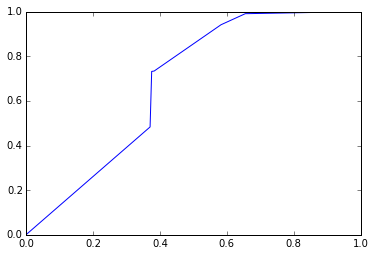

In [57]:
pl.plot(fpr,tpr)
pl.show()

##SVM

In [ ]:
# Recall:
# X = df[['xval', 'yval', 'zval', 'xdiff', 'ydiff', 'zdiff']]
# y = df['activity']
# X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.40)
from sklearn import svm
svc = svm.SVC()
model_svm = svc.fit(X_train, y_train)

In [ ]:
svm_test_pred = svc.predict(X_test)

In [ ]:
print("Accuracy = %f" %(skm.accuracy_score(y_test, svm_test_pred)))

In [ ]:
print("Precision = %f" %(skm.precision_score(y_test, svm_test_pred)))

In [ ]:
print("Recall = %f" %(skm.recall_score(y_test, svm_test_pred)))

In [ ]:
print("F1 score = %f" %(skm.f1_score(y_test, svm_test_pred)))

####Confusion Matrix

In [ ]:
cm_svm = skm.confusion_matrix(y_test, svm_test_pred)

In [ ]:
pl.matshow(cm_svm)
pl.title('Confusion matrix for test data\n'
         + '                               ')
pl.xlabel('Predicted')
pl.ylabel('True')
pl.colorbar()
pl.show()

####ROC Curve

In [ ]:
fpr_svm, tpr_svm, thresholds_svm = skm.roc_curve(y_test, svm_test_pred, pos_label=6)

In [ ]:
skm.auc(fpr_svm, tpr_svm)

In [ ]:
pl.plot(fpr_svm,tpr_svm)
pl.show()